# Assignment 3 - Inverse Problems 2023 - Emilie Jessen

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import linalg
import scipy.stats

In [16]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite',
        'grid': 'True'}
mpl.rc('axes', **axes)

In [17]:
# Loading the data
data = np.loadtxt("mars_soil.txt")
x = np.array(data[:,0])
y = np.array(data[:,1])

# The data uncertainties are Gaussian with a standard deviation of 0.03*10**4
yerr = np.ones(len(x)) * 0.03*10**4

In [18]:
# Inspecting the data to make initial guess on model parameters 

# Estimating the number of peaks to 20 
N_peaks = 20

# Areas for Gaussian fit 
A0 = np.array([-500, -1500, -1200, -300, -600, -900, -1300, -350, -950, -500, \
      -500, -1100, -550, -1300, -1050, -700, -500, -1400, -1500, -600])

# Areas for Lorentzian fit
A0_L = np.array([-500, -1500, -1500, -400, -850, -1150, -1350, -450, -1300, -500, \
      -500, -1350, -550, -1400, -1050, -850, -350, -1450, -1500, -600]) * 2.6

# Widths 
c0 = np.array([0.15, 0.15, 0.12, 0.1, 0.1, 0.12, 0.14, 0.1, 0.11, 0.15, \
      0.15, 0.12, 0.14, 0.13, 0.13, 0.11, 0.15, 0.14, 0.14, 0.15])

# Frequencies 
f0 = np.array([-10.5, -8.8, -7.65, -6.95, -6.45, -5.55, -4.35,-3.65, -3.15, \
      -1.7, 1.7, 3.1, 3.6, 4.25, 5.45, 6.35, 6.85, 7.55, 8.75, 10.5])


# Collecting the initial guess in a vector - Gaussian 
m0 = np.zeros(3*N_peaks)

for i in range(N_peaks):
    m0[3*i :3*i + 3] = [A0[i], f0[i], c0[i]]


# Collecting the initial guess in a vector - Lorentzian
m0_L = np.zeros(3*N_peaks)

for i in range(N_peaks):
    m0_L[3*i :3*i + 3] = [A0_L[i], f0[i], c0[i]]

In [19]:
def fit_data(x, m, peak_shape='Gauss'):
    """Function that takes the model parameters and returns the fit to the data given the shape of the peaks."""

    A = m[::3]
    f = m[1::3]
    c = m[2::3]

    if peak_shape == 'Gauss':

        fit = np.zeros(len(x)) + 12550

        for i in range(N_peaks):
            fit += A[i] * scipy.stats.norm.pdf(x, loc=f[i], scale=c[i])

    else: 

        fit = np.zeros(len(x)) + 12660

        for i in range(N_peaks):
            fit += A[i] * c[i]**2 / ((x - f[i])**2 + c[i]**2)

    return fit

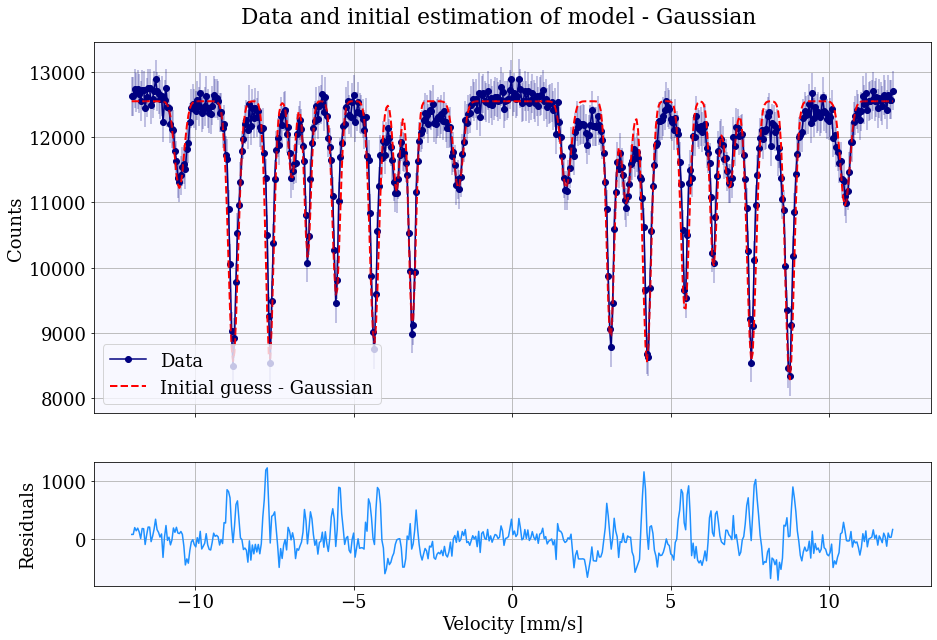

In [20]:
# Getting the initial fit to the data - Gaussian
init_gauss = fit_data(x, m0, 'Gauss')

# Visualising the data and initial estimate of the model - Gaussian

fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
title = fig.suptitle('Data and initial estimation of model - Gaussian', y=0.93)
ax[0].plot(x, y, '-o', label='Data', color='navy')
ax[0].plot(x, init_gauss, '--', lw=2, label='Initial guess - Gaussian', color='red')
ax[0].errorbar(x, y, yerr=yerr, color='navy', alpha=0.3)
ax[0].set(ylabel='Counts')

ax[1].plot(x, y - init_gauss, '-', color='dodgerblue')
ax[1].set(xlabel='Velocity [mm/s]', 
       ylabel='Residuals')

ax[0].legend();

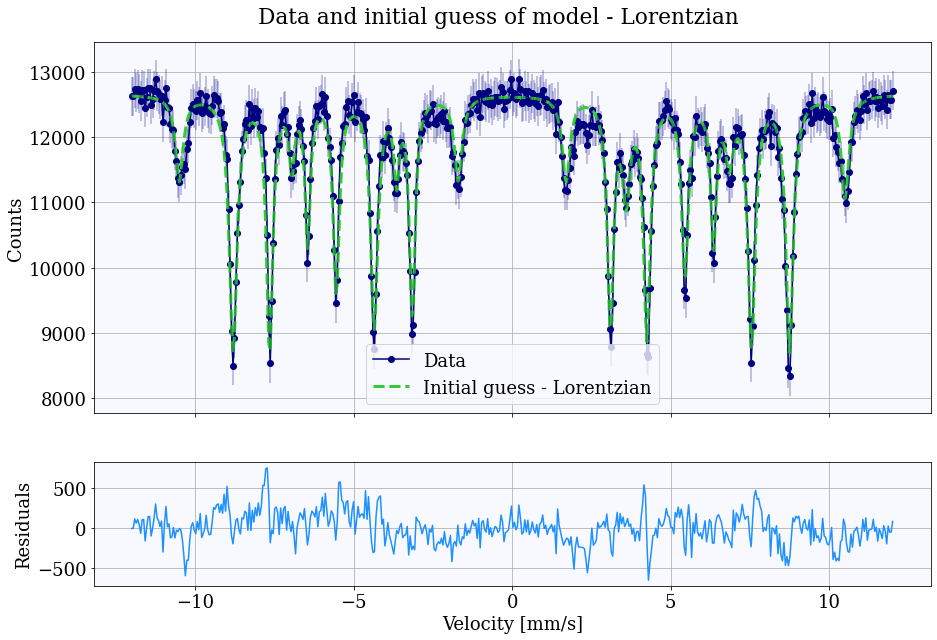

In [21]:
# Getting the initial fit to the data - Lorentzian
init_lorentz = fit_data(x, m0_L, 'Lorentz')

# Visualising the data and initial estimate of the model - Lorentzian

fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
title = fig.suptitle('Data and initial guess of model - Lorentzian', y=0.93)
ax[0].plot(x, y, '-o', label='Data', color='navy')
ax[0].plot(x, init_lorentz, '--', lw=3, label='Initial guess - Lorentzian', color='limegreen')
ax[0].errorbar(x, y, yerr=yerr, color='navy', alpha=0.3)
ax[0].set(ylabel='Counts')

ax[1].plot(x, y - init_lorentz, '-', color='dodgerblue')
ax[1].set(xlabel='Velocity [mm/s]', 
       ylabel='Residuals')

ax[0].legend();


1. Using the non-linear forward relation: $\mathbf{d} = g(\mathbf{m})$ to obtain the analytical formulas for the derivatives. In the Gaussian case the shape of the peaks is given by: 

$$  \frac{\partial{g_i}}{\partial{A_p}} = \frac{A_p}{\sqrt{2\pi}c_p} \exp{ \left[-\frac{(z_i - f_p)^2}{2c_p^2} \right]}$$

And has the derivatives: 

$$  \frac{\partial{g_i}}{\partial{A_p}} = \frac{1}{\sqrt{2\pi}c_p} \exp{ \left[-\frac{(z_i - f_p)^2}{2c_p^2} \right]}$$

$$  \frac{\partial{g_i}}{\partial{f_p}} = \frac{A_p}{\sqrt{2\pi}c_p} \exp{ \left[-\frac{(z_i - f_p)^2}{2c_p^2} \right]} \cdot \frac{(z_i - f_p)}{c_p^2}$$

$$  \frac{\partial{g_i}}{\partial{c_p}} = \frac{A_p}{\sqrt{2\pi}} \left( \frac{-1}{c_p^2} \exp{ \left[-\frac{(z_i - f_p)^2}{2c_p^2} \right]} + \frac{(z_i - f_p)^2}{c_p^4} \exp{ \left[-\frac{(z_i - f_p)^2}{2c_p^2} \right]} \right)$$

In the code below the expressions for the Gaussian case are implemented. 

In [22]:
def dGauss_dA(x, A, c, f): 
    const = 1 / (np.sqrt(2 * np.pi) * c)
    exp = np.exp(-(x - f)**2 / (2 * c**2))
    return  const * exp


def dGauss_df(x, A, c, f):
    const = A / (np.sqrt(2 * np.pi) * c)
    exp = np.exp(-(x - f)**2 / (2 * c**2))
    return  const * exp * (x - f) / c**2


def dGauss_dc(x, A, c, f):
    const1 = -A / (np.sqrt(2 * np.pi) * c**2)
    const2 = A / (np.sqrt(2 * np.pi) * c)
    exp = np.exp(-(x - f)**2 / (2 * c**2))
    return const1 * exp + const2 * exp * (x - f)**2 / c**3

2. In the code below the analytical formulas for the derivatives for the Lorentzian case are implemented. In the Lorentzian case the peaks have the shape: 

$$  \frac{\partial{g_i}}{\partial{A_p}} = \frac{A_p c_p^2}{(z_i - f_p)^2 + c_p^2} $$

And the derivatives: 

$$  \frac{\partial{g_i}}{\partial{A_p}} = \frac{c_p^2}{(z_i - f_p)^2 + c_p^2} $$

$$  \frac{\partial{g_i}}{\partial{f_p}} = \frac{A_p c_p^2}{((z_i - f_p)^2 + c_p^2)^2} \cdot 2(z_i - f_p) $$


$$  \frac{\partial{g_i}}{\partial{c_p}} = 2 A_p c_p \left( \frac{1}{(z_i - f_p)^2 + c_p^2} - \frac{c_p^2}{((z_i - f_p)^2 + c_p^2)^2}  \right)$$

In [23]:
def dLorentz_dA(x, A, c, f):
    return c**2 / ((x - f)**2 + c**2)

def dLorentz_df(x, A, c, f):
    nom = (x - f)**2 + c**2
    return A * c**2 / nom**2 * (2 * (x - f))

def dLorentz_dc(x, A, c, f):
    nom = ((x - f)**2 + c**2)
    return 2 * A * c / nom - 2 * A * c**3 / nom**2

3. In the code below a function is implemented to evaluate the derivatives in the solution $\mathbf{m}$ and stored in the G-matrix for the Gaussian and Lorentzian case. The evaluation is shown for the initial estimate on the model parameters.

In [24]:
def G_matrix(x, m, peak_shape='Gauss'): 
    """Function that returns the G matrix for the given model parameters m and the shape of the peaks."""

    A = m[::3]
    f = m[1::3]
    c = m[2::3]

    G = np.zeros((len(m), len(x)))

    if peak_shape == 'Gauss':

        for i in range(len(x)):
            G[::3, i] = dGauss_dA(x[i], A, c, f)
            G[1::3, i] = dGauss_df(x[i], A, c, f)
            G[2::3, i] = dGauss_dc(x[i], A, c, f)

    else:
            
        for i in range(len(x)):
            G[::3, i] = dLorentz_dA(x[i], A, c, f)
            G[1::3, i] = dLorentz_df(x[i], A, c, f)
            G[2::3, i] = dLorentz_dc(x[i], A, c, f)

    return G.T

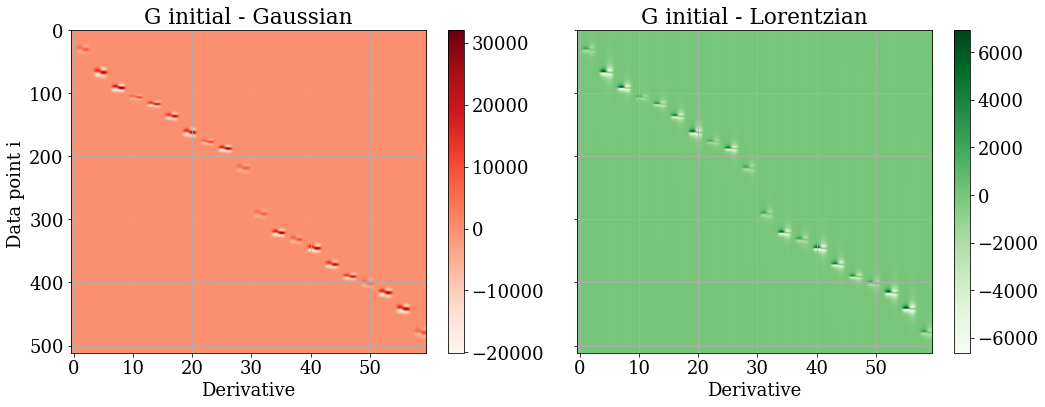

In [25]:
# Visualising the G matrix for the initial estimate of the model

G0_Gauss = G_matrix(x, m0, 'Gauss')
G0_Lorentz = G_matrix(x, m0, 'Lorentz')

fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)
im0 = ax[0].imshow(G0_Gauss, cmap='Reds', aspect='auto')
fig.colorbar(im0, ax=ax[0])
ax[0].set(xlabel='Derivative', 
       ylabel='Data point i ',
       title='G initial - Gaussian')

im1 = ax[1].imshow(G0_Lorentz, cmap='Greens', aspect='auto')
fig.colorbar(im1, ax=ax[1])
ax[1].set(xlabel='Derivative', 
       title='G initial - Lorentzian')
fig.tight_layout();

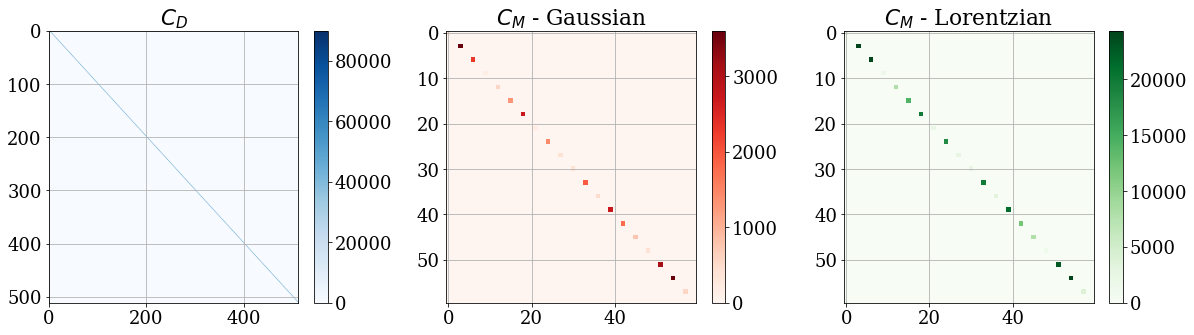

In [26]:
# Data covariance matrix - assuming uncorrelated data
C_D = np.diag(yerr**2)

# Estimating correlation between the width and area of the peaks
corr_val = 1e-5
corr_M = np.array([np.array([0, 1, 0]), 
                   np.array([1, 0, 0]), 
                   np.array([0, 0, 0])])
corr = np.kron(np.eye(20), corr_M)


# Esimating the uncertainties in the parameter values as percentages of the initial guess
sigma_A_Gauss = A0 * 0.04  
sigma_A_Lorentz = A0_L * 0.04    
sigma_f = f0 * 0.01
sigma_c = c0 * 0.02

# Creating the covariance matrices for the model parameters as a sum of the diagonal matrix of the uncertainties and the correlation matrix
C_M_Gauss = np.diag(np.array([sigma_A_Gauss**2, sigma_f**2, sigma_c**2]).reshape(3,20).T.flatten()) + corr
C_M_Lorentz = np.diag(np.array([sigma_A_Lorentz**2, sigma_f**2, sigma_c**2]).reshape(3,20).T.flatten()) + corr


# Visaualising the covariance matrices
fig, ax = plt.subplots(ncols=3, figsize=(17, 5))

im1 = ax[0].imshow(C_D, cmap='Blues', aspect='auto')
ax[0].set(title=r'$C_D$')

im2 = ax[1].imshow(C_M_Gauss, cmap='Reds', aspect='auto')
ax[1].set(title=r'$C_M$ - Gaussian')

im3 = ax[2].imshow(C_M_Lorentz, cmap='Greens', aspect='auto')
ax[2].set(title=r'$C_M$ - Lorentzian')

fig.colorbar(im1, ax=ax[0])
fig.colorbar(im2, ax=ax[1])
fig.colorbar(im3, ax=ax[2])
fig.tight_layout();

The iterative steepest descent algorithm is implemented using the formula: 

$$ m_{k+1} = m_k - \epsilon_k(\mathbf{C}_M \mathbf{G}_k^T \mathbf{C_D}^{-1}(\mathbf{g}_k - \mathbf{d_obs}) + (\mathbf{m}_k - \mathbf{m}_{prior}))  $$

where 
* $\mathbf{C}_M$ is the covariance matrix for the model parameters. This matrix makes sure that we take a step in the direction of the steepest descent and not in the direction of the gradient (eq. 108 in the notes.)
* $\mathbf{G}_k$ is the matrix containing the derivatives. 
* $\mathbf{C_D}$ is the covariance matrix for the data parameters. The data is assumed independent and this matrix is therefore diagonal. 
* $\mathbf{g}$ is the fit function calculated with the model parameters $\mathbf{k}$. 
* $\epsilon_k$ is the step size and is chosen to be a small positive number, which will make the algorthm converge properly. 


In [27]:
def steepest_descent(x, y, m0, epsilon, max_iter, peak_shape='Gauss'):
    """Function that returns the model parameters and the residuals for the steepest descent method."""
    
    m = m0.copy()
    resi = []

    if peak_shape == 'Gauss':
        C_M = C_M_Gauss
    else:
        C_M = C_M_Lorentz

    for _ in range(max_iter):
        G = G_matrix(x, m, peak_shape)
        g = fit_data(x, m, peak_shape)
        
        m_new = m - epsilon * (C_M @ G.T @ np.linalg.inv(C_D) @ (g - y) + (m - m0))
        m = m_new.copy()
        resi.append(np.sum((y - g)**2))
        
    return m, resi

In [28]:
# Running the steepest descent method for the Gaussian peaks
m_best_G, all_resi_G = steepest_descent(x, y, m0, 5e-4, 5000, 'Gauss')

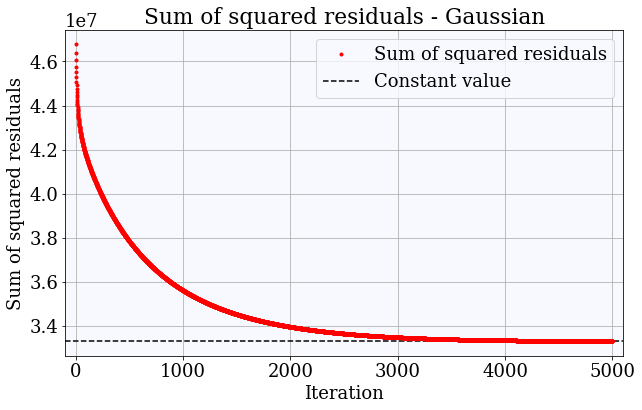

In [29]:
# Checking if the algorithm has converged by inspecting the sum of the squared residuals
# If the algorithm has converged, the sum of the squared residuals should be approx. constant, which it is

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(all_resi_G, '.', color='red', label='Sum of squared residuals')
ax.hlines(all_resi_G[-1], -100, 5100, linestyle='dashed', color='black', label='Constant value')
ax.set(xlabel='Iteration', 
       ylabel='Sum of squared residuals', 
       title='Sum of squared residuals - Gaussian',
       xlim=(-100, 5100))
ax.legend();

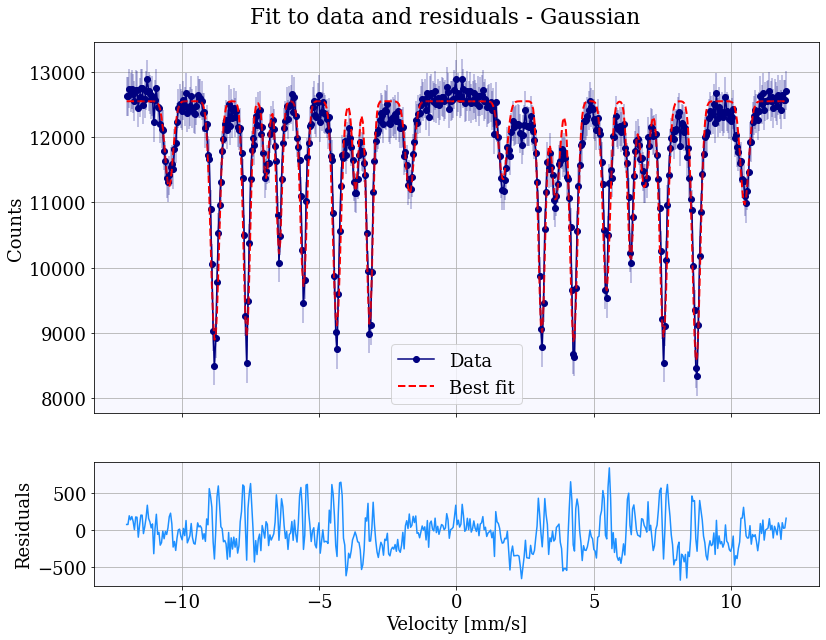

In [30]:
# Visualising the fit to the data and the residuals: 
fit_G = fit_data(x, m_best_G, 'Gauss')
resi_G = y - fit_G  

fig, ax = plt.subplots(nrows=2, figsize=(13, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
title = fig.suptitle('Fit to data and residuals - Gaussian', y=0.93)

ax[0].plot(x, y, '-o', label='Data', color='navy')
ax[0].plot(x, fit_G, '--', lw=2, label='Best fit', color='red')
ax[0].set(ylabel='Counts')
ax[0].errorbar(x, y, yerr=yerr, color='navy', alpha=0.3)
ax[0].legend()
ax[1].plot(x, resi_G, '-', color='dodgerblue')
ax[1].set(ylabel='Residuals', 
          xlabel='Velocity [mm/s]');

In [31]:
# Running the steepest descent method for the Lorentzian peaks
m_best_L, all_resi_L = steepest_descent(x, y, m0_L, 5e-4, 5000, 'Lorentz')

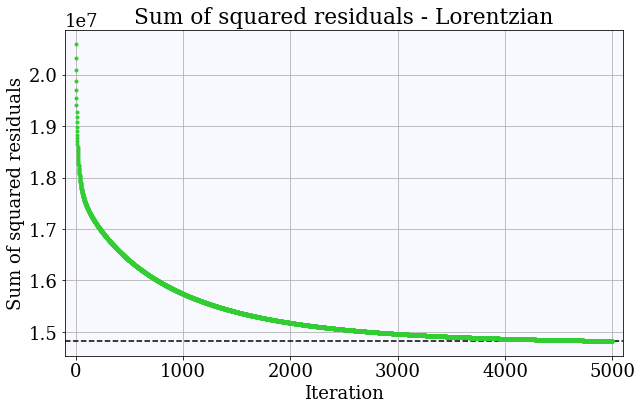

In [32]:
# Checking if the algorithm has converged by inspecting the sum of the squared residuals
# It has converged

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(all_resi_L, '.', color='limegreen', label='Sum of squared residuals')
ax.hlines(all_resi_L[-1], -100, 5100, linestyle='dashed', color='black', label='Constant value')
ax.set(xlabel='Iteration', 
       ylabel='Sum of squared residuals', 
       title='Sum of squared residuals - Lorentzian', 
       xlim=(-100, 5100));

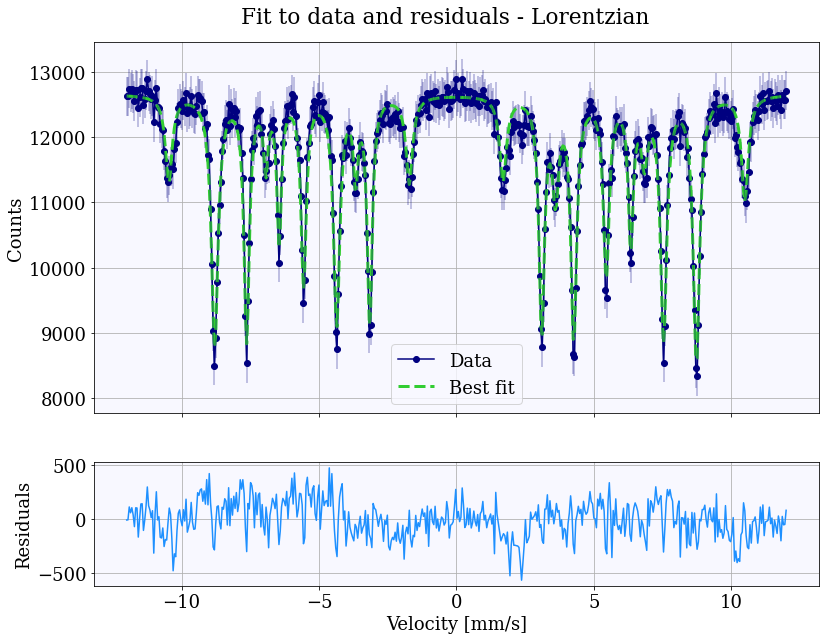

In [33]:
# Visualising the fit to the data and the residuals - Lorentzian
fit_L = fit_data(x, m_best_L, 'Lorentz')
resi_L = y - fit_L  

fig, ax = plt.subplots(nrows=2, figsize=(13, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
title = fig.suptitle('Fit to data and residuals - Lorentzian', y=0.93)

ax[0].plot(x, y, '-o', label='Data', color='navy')
ax[0].plot(x, fit_L, '--', lw=3, label='Best fit', color='limegreen')
ax[0].set(ylabel='Counts')
ax[0].errorbar(x, y, yerr=yerr, color='navy', alpha=0.3)
ax[0].legend()
ax[1].plot(x, resi_L, '-', color='dodgerblue')
ax[1].set(ylabel='Residuals', 
          xlabel='Velocity [mm/s]');

4. Both of the models qualitatively looks like a good fit to the data. The residuals of the two models have the same order of magnitude and they both seem to fit the data within the errorbars. To quantitatively determine which of the two models fits the data the best, the residuals are plotted as histograms and they both take the approximate shape of a Gaussian distribution. We would like to compare the distributions of residuals to a distribution randomly drawn from the Gaussian noise distribution, i.e. with mean = 0 and std = 0.03 * 10^4. If the distributions of the residuals statistically correspond to the noise distribution, then the differences between the model and data could equally be explained by errors in the fit as the uncertainty on the data. 

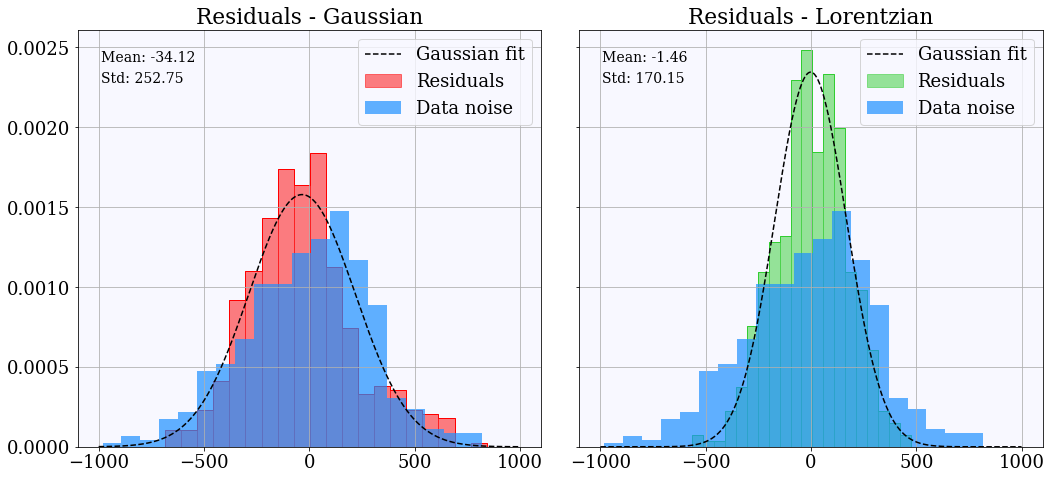

In [34]:
# Drawing a random sample from the Gaussian distribution of the noise - i.e. mean = 0 and std = 0.03 * 10^4
# This distribution is to compare to the residual distributions to estimate if the difference between model and data is due to noise or not
noise_dist = np.random.normal(0, yerr[0], len(y))

# Calculating the mean and standard deviation of the residual histograms for the Gaussian and Lorentzian fits
mean_G = np.mean(resi_G)    
std_G = np.std(resi_G)

mean_L = np.mean(resi_L)
std_L = np.std(resi_L)

# Creating an axis for the Gaussian fit
axis = np.linspace(-1000, 1000, 1000)

# Plotting
fig, ax = plt.subplots(ncols=2, figsize=(15, 7), sharey=True)
ax[0].hist(resi_G, bins=20, color='red', alpha=0.5, density=True, edgecolor='red', histtype='bar', label='Residuals')
ax[0].hist(resi_G, bins=20, color='red', density=True, histtype='step')
ax[0].hist(noise_dist, bins=20, color='dodgerblue', alpha=0.7,  density=True, label='Data noise')
ax[0].plot(axis, scipy.stats.norm.pdf(axis, mean_G, std_G), '--', color='black', label='Gaussian fit')
ax[0].text(0.05, 0.95, f'Mean: {mean_G:.2f}', transform=ax[0].transAxes, fontsize=14, verticalalignment='top')
ax[0].text(0.05, 0.9, f'Std: {std_G:.2f}', transform=ax[0].transAxes, fontsize=14, verticalalignment='top')
ax[0].set(title='Residuals - Gaussian')
ax[0].legend()

ax[1].hist(resi_L, bins=20, color='limegreen', alpha=0.5, density=True, edgecolor='limegreen', histtype='bar', label='Residuals')
ax[1].hist(resi_L, bins=20, color='limegreen', density=True, histtype='step')
ax[1].hist(noise_dist, bins=20, color='dodgerblue', alpha=0.7, density=True, label='Data noise')
ax[1].plot(axis, scipy.stats.norm.pdf(axis, mean_L, std_L), '--', color='black', label='Gaussian fit')
ax[1].text(0.05, 0.95, f'Mean: {mean_L:.2f}', transform=ax[1].transAxes, fontsize=14, verticalalignment='top')
ax[1].text(0.05, 0.9, f'Std: {std_L:.2f}', transform=ax[1].transAxes, fontsize=14, verticalalignment='top')
ax[1].set(title='Residuals - Lorentzian')
ax[1].legend()
fig.tight_layout();

In the figure above the distribution of residuals for the Gaussian fit qualitatively aligns best with the noise distribution, while the distibution of residuals for the Lorentzian model looks too narrow compared to the noise distribution. This would suggest that in the Lorentzian case, the fit is too good and is therefore fitting the noise as well. It might be a result of overestimating the errors on the model parameters. In the code below Anderson-Darling tests and Kolmogorow-Smirnov tests are performed to obtain an objective measure of how well the distributions of residuals fit the noise distribution. The resulting p-values are very small and are therefore suggesting that none of the models is fitting the data properly within their uncertainties. 

In [35]:
AD_Gauss = scipy.stats.anderson_ksamp([resi_G, noise_dist])
AD_Lorentz = scipy.stats.anderson_ksamp([resi_L, noise_dist])

KS_Gauss = scipy.stats.ks_2samp(resi_G, noise_dist)
KS_Lorentz = scipy.stats.ks_2samp(resi_L, noise_dist)

<ipython-input-35-1b708b2e3208>:1: UserWarning: p-value floored: true value smaller than 0.001
  AD_Gauss = scipy.stats.anderson_ksamp([resi_G, noise_dist])
<ipython-input-35-1b708b2e3208>:2: UserWarning: p-value floored: true value smaller than 0.001
  AD_Lorentz = scipy.stats.anderson_ksamp([resi_L, noise_dist])


In [36]:
print('Gaussian')
print('P-value for Anderson-Darling test: ', AD_Gauss[-1])
print('P-value for Kolmogorov-Smirnov test: ', KS_Gauss.pvalue)

print('\nLorentzian')
print('P-value for Anderson-Darling test: ', AD_Lorentz[-1])
print('P-value for Kolmogorov-Smirnov test: ', KS_Lorentz.pvalue)

Gaussian
P-value for Anderson-Darling test:  0.001
P-value for Kolmogorov-Smirnov test:  1.810085309544951e-05

Lorentzian
P-value for Anderson-Darling test:  0.001
P-value for Kolmogorov-Smirnov test:  3.290210911685809e-05
